In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score
from itertools import combinations

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/processed/WESAD/data_processed/30s/all_data.csv', index_col=0)
df.head(10)

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,...,hr_sdnn_ratio,acc_hr_slope_diff,sdnn_netacc_ratio,eda_hr_interaction,eda_resp_ratio,hr_resp_interaction,hrv_composite,hrv_stress_index,arousal_index,focus_label
0,53.356667,16.646000,22.310000,63.403083,3.464344,0.640051,0.042624,-0.001226,23.547401,3.927255,...,0.484254,3.603922,2.786436,54.757937,0.010853,2014.537539,122.855695,1.245035,1289.407069,1
1,54.384667,14.914000,23.598000,63.423202,2.527858,0.522190,0.027494,-0.000580,24.049974,3.610985,...,0.470618,1.264275,3.103511,48.372475,0.007614,2227.841975,184.537901,0.704795,1163.356764,1
2,55.673333,17.130000,22.103333,63.371988,1.759675,0.504689,0.013444,0.000012,23.252303,3.880405,...,0.473227,-0.742401,3.019624,45.702928,0.003465,2105.649261,177.633397,0.738724,1062.698301,1
3,50.268000,20.538000,26.323333,63.354186,2.607511,0.505930,0.016788,0.000090,22.749655,2.992443,...,0.448400,4.537308,3.124974,44.913563,0.005610,2019.584005,179.032540,0.762547,1021.768085,1
4,53.884667,13.176000,-20.754667,63.015126,1.203854,0.455631,0.021998,-0.000634,22.229279,6.140247,...,0.690826,7.844220,1.775132,35.209239,0.003583,1717.786631,92.813257,0.857373,782.676010,1
5,50.273333,25.046667,15.344000,63.379411,2.137492,0.390891,0.016305,-0.000458,21.609385,2.637111,...,0.605929,4.037823,2.212658,33.215446,0.006183,1836.227356,115.309797,0.948844,717.765359,1
6,53.982000,26.252000,17.136667,63.424968,0.871813,0.361442,0.014805,-0.000326,23.378201,4.010276,...,0.409805,-7.953004,3.652124,34.310077,0.003692,2219.187217,210.631554,0.718897,802.107854,1
7,54.366000,25.382000,20.492667,63.447958,0.413116,0.329505,0.016684,-0.000409,22.043036,2.176582,...,0.443754,-3.593902,3.302668,30.639888,0.007665,2049.730009,161.954025,1.003510,675.396167,1
8,44.229333,16.220667,-32.767333,63.142306,1.199372,0.281476,0.014150,-0.000311,24.014866,4.418985,...,0.458001,4.421966,3.059566,24.905113,0.003202,2124.842722,172.989547,0.753024,598.092956,1
9,42.374667,13.378667,-44.673333,63.016231,0.365034,0.242791,0.010291,-0.000257,21.259364,2.974239,...,0.443430,6.883157,2.861205,19.411452,0.003460,1699.715861,157.300446,0.788235,412.675119,1


In [3]:
focus_corr = df.corr()['focus_label'].drop(['focus_label', 'label', 'subject'])
top_features = focus_corr.abs().sort_values(ascending=False).head(17).index.tolist()

In [4]:
selected_columns =  top_features + ['subject', 'focus_label']

In [5]:
df_top = df[selected_columns]
df_top.head()

,hr_resp_interaction,hr_center,hr_netacc_interaction,hr_zscore,HR,IBI,RESP_rate,EDA_std,eda_resp_ratio,arousal_index,eda_hr_interaction,EDA_mean,RESP_regularity,ACC_y_mean,EDA_slope,ACC_z_mean,hrv_stress_index,subject,focus_label
0,2014.537539,-4.075092,5424.288387,-0.386345,85.552438,754.407051,23.547401,0.042624,0.010853,1289.407069,54.757937,0.640051,3.927255,16.646,-0.001226,22.310000,1.245035,2,1
1,2227.841975,3.006332,5875.136190,0.285020,92.633862,707.698171,24.049974,0.027494,0.007614,1163.356764,48.372475,0.522190,3.610985,14.914,-0.000580,23.598000,0.704795,2,1
2,2105.649261,0.929061,5738.751225,0.088081,90.556591,714.939024,23.252303,0.013444,0.003465,1062.698301,45.702928,0.504689,3.880405,17.130,0.000012,22.103333,0.738724,2,1
3,2019.584005,-0.853262,5624.221511,-0.080895,88.774268,735.156250,22.749655,0.016788,0.005610,1021.768085,44.913563,0.505930,2.992443,20.538,0.000090,26.323333,0.762547,2,1
4,1717.786631,-12.351672,4869.547945,-1.171018,77.275859,798.986486,22.229279,0.021998,0.003583,782.676010,35.209239,0.455631,6.140247,13.176,-0.000634,-20.754667,0.857373,2,1


In [6]:
X = df_top.drop(columns=['focus_label', 'subject'])
y = df_top['focus_label']
groups = df_top['subject']
subject_ids = sorted(groups.unique())
subject_pairs = list(combinations(subject_ids, 2))

In [7]:
X.columns

Index(['hr_resp_interaction', 'hr_center', 'hr_netacc_interaction',
       'hr_zscore', 'HR', 'IBI', 'RESP_rate', 'EDA_std', 'eda_resp_ratio',
       'arousal_index', 'eda_hr_interaction', 'EDA_mean', 'RESP_regularity',
       'ACC_y_mean', 'EDA_slope', 'ACC_z_mean', 'hrv_stress_index'],
      dtype='object')

In [8]:
svm_preds = []

In [9]:
for i, test_subjects in enumerate(subject_pairs):
    test_mask = groups.isin(test_subjects)
    train_mask = ~test_mask

    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]
    subject_test = groups[test_mask]

    model = SVC()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    df_fold = pd.DataFrame({
        'fold': i,
        'subject': subject_test.values,
        'y_true': y_test,
        'y_pred': y_pred
    })
    svm_preds.append(df_fold)

In [10]:
df_svm_error = pd.concat(svm_preds, ignore_index=True)

In [11]:
df_svm_error['wrong'] = df_svm_error['y_true'] != df_svm_error['y_pred']
error_by_subject = (
    df_svm_error.groupby('subject')['wrong']
    .mean()
    .sort_values(ascending=False)
)

In [12]:
print("SVM Error Rate per Subject:")
print(error_by_subject)

SVM Error Rate per Subject:
subject
15    0.947959
13    0.611224
3     0.565826
10    0.442396
8     0.388060
7     0.323185
5     0.272397
9     0.214286
11    0.167116
4     0.162338
14    0.160714
17    0.129540
2     0.099125
6     0.029650
16    0.003456
Name: wrong, dtype: float64


In [13]:
target_subj = 15

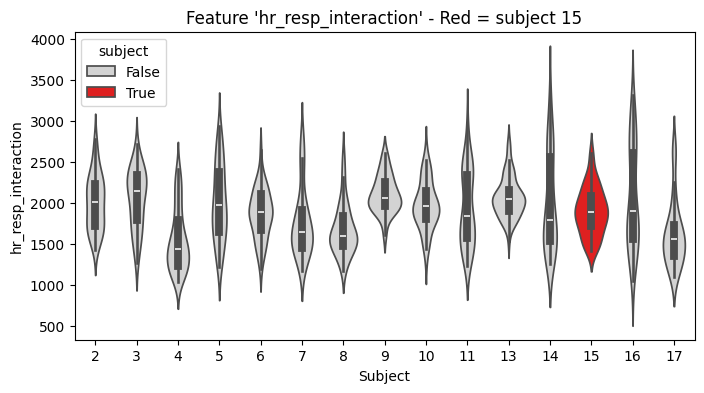

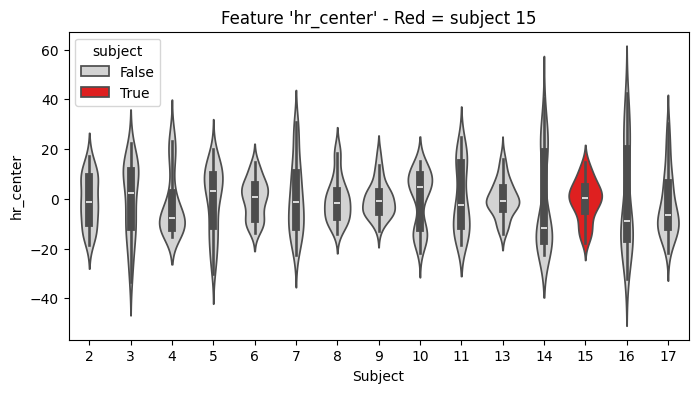

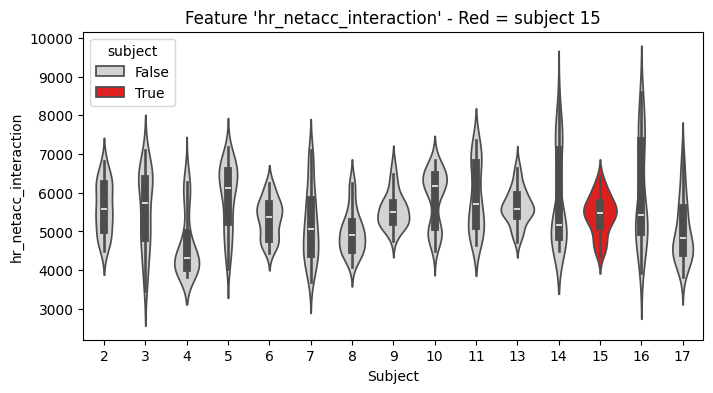

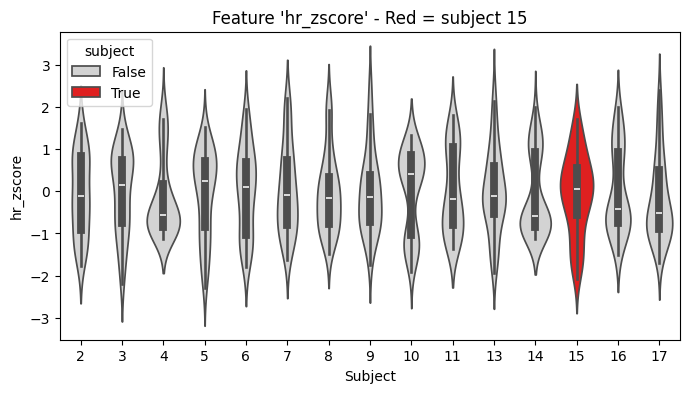

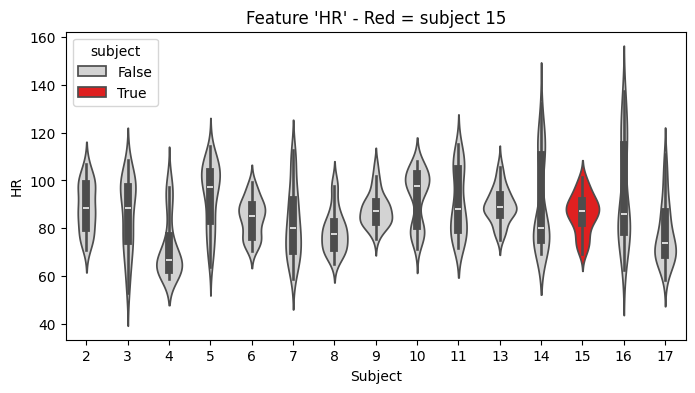

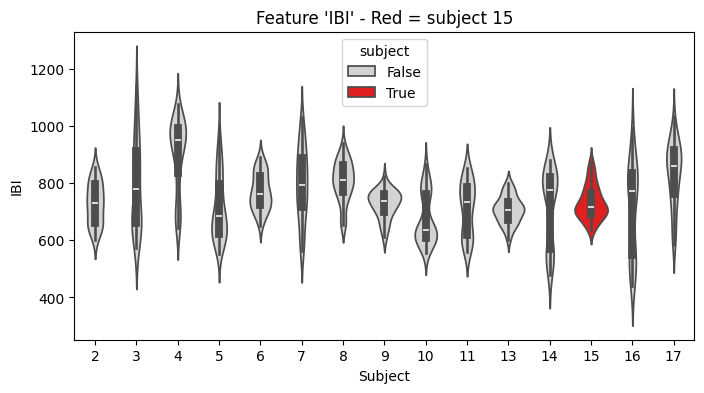

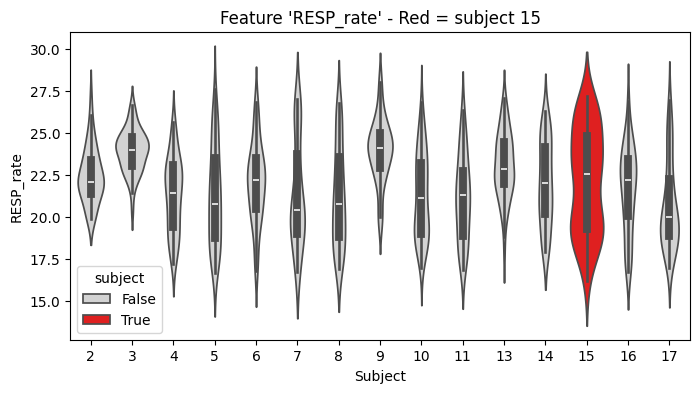

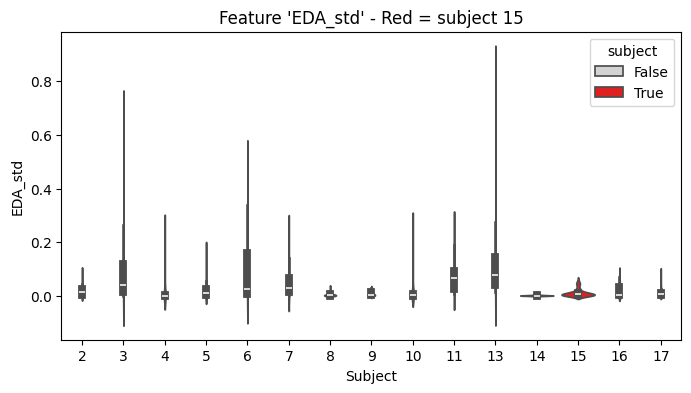

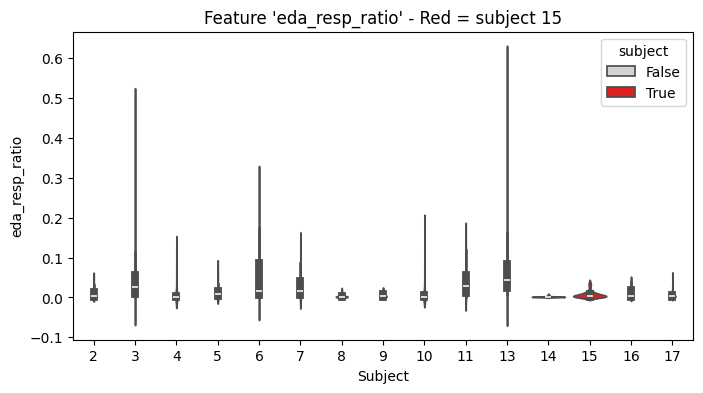

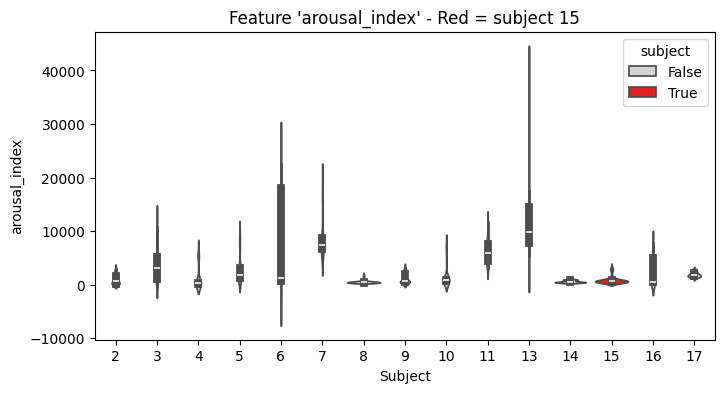

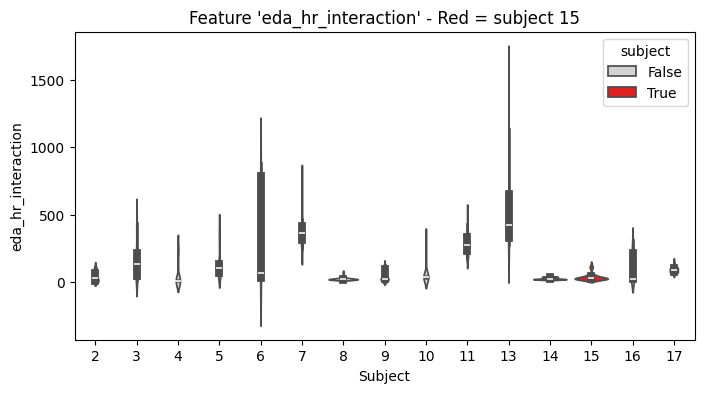

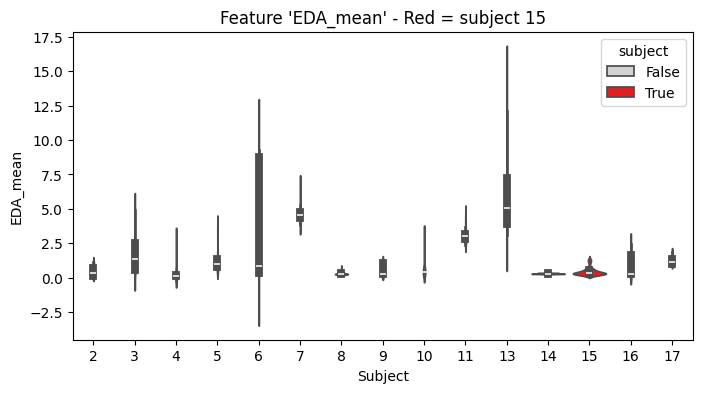

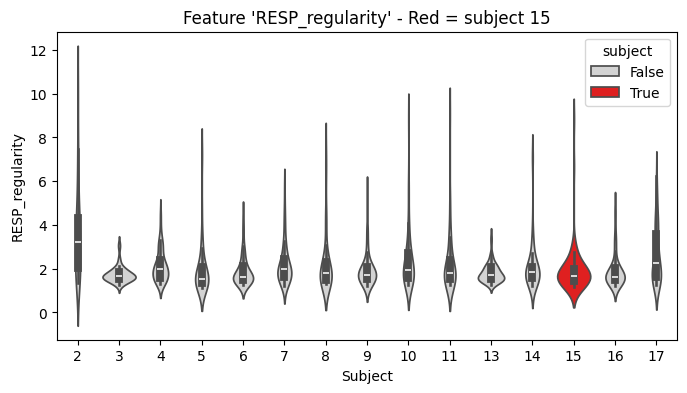

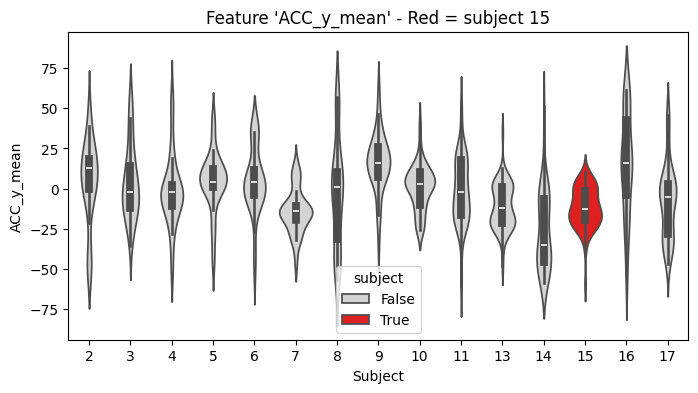

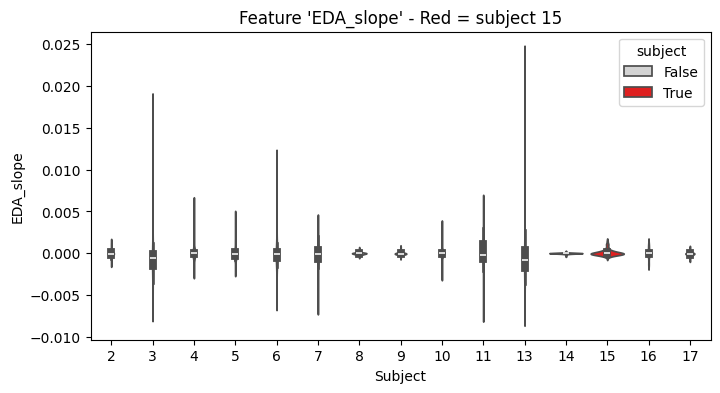

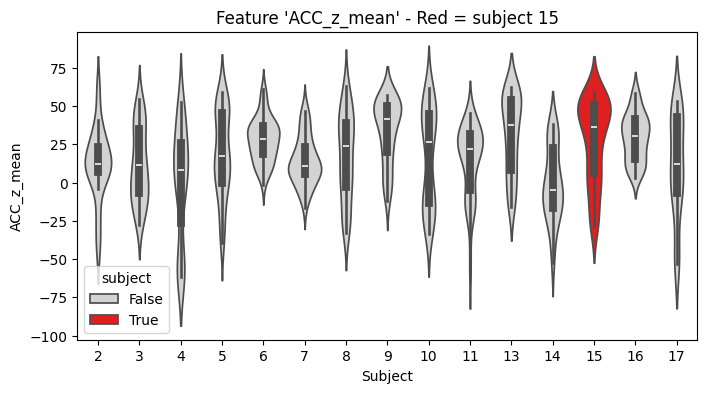

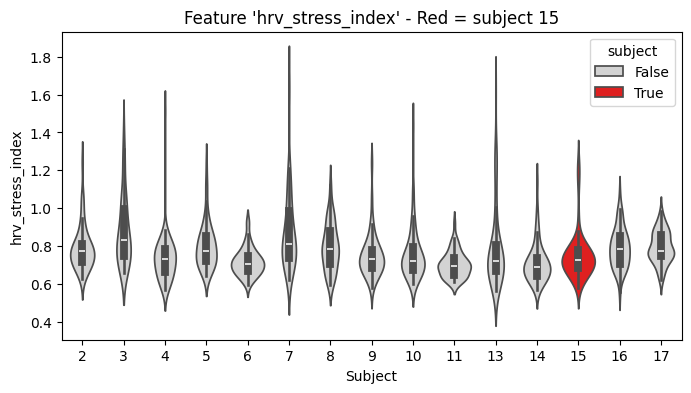

In [14]:
for col in X.columns:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=groups, y=X[col], hue=(groups == target_subj), palette=["lightgray", "red"])
    plt.title(f"Feature '{col}' - Red = subject {target_subj}")
    plt.xlabel("Subject")
    plt.ylabel(col)
    plt.show()